In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
prefix = 'perfect'
current = pd.read_csv(prefix + '_cur.csv')
desired = pd.read_csv(prefix + '_des.csv')
current.columns = ['timestamp', 'rel_pos_current']
desired.columns = ['timestamp', 'rel_pos_desired']
current['timestamp'] = current['timestamp'].astype(str).str[:-7].astype(np.int64)
desired['timestamp'] = desired['timestamp'].astype(str).str[:-7].astype(np.int64)

count = 0
start = current['timestamp'][0]
for timestamp in current['timestamp']:
    current['timestamp'][count] = current['timestamp'][count] - start
    count += 1
count = 0
start = desired['timestamp'][0]
for timestamp in desired['timestamp']:
    desired['timestamp'][count] = desired['timestamp'][count] - start
    count += 1

C:\Users\felix\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\felix\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\felix\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


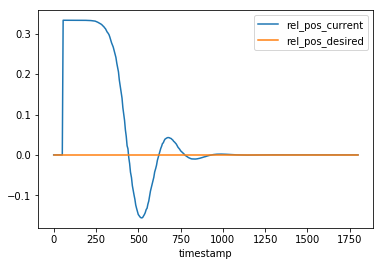

In [78]:
df = current.merge(desired, on='timestamp')
df.plot(kind='line', y=['rel_pos_current', 'rel_pos_desired'],x='timestamp')

In [79]:
df.to_csv(prefix + '.csv')